In [34]:
# Definition of cubic polynomial fit for wavelength solution

In [2]:
# Eqn. (7) in Brandt+ 2017 JATIS is only appropriate for grid of spectra

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
# fake spectrum
stem_spec = '/Users/bandari/Documents/git.repos/rrlfe/src/model_spectra/rrmods_all/original_ascii_files'
spec_fake = pd.read_csv(stem_spec + '/700020m30.smo', delim_whitespace=True, names=['wavel','flux','noise'])

In [10]:
# say we've extracted the following in channel space

spec_extracted = spec_fake['flux'].values

In [3]:
# for a given wavelength, these are the coordinates of the pixels and lenslets

N_data_pts = 100

# pixel x values
input_x_coords = np.linspace(0.,1000.,num=N_data_pts)
# pixel y values
input_y_coords = np.linspace(30.,20.,num=N_data_pts)

# lenslet/channel coords
channel_i_coords = np.arange(0,N_data_pts) # footprint number
channel_j_coords = np.arange(0,N_data_pts) # delta_wavel

# equivalent wavelength steps
wavel_channel_steps = np.linspace(3900.,5299.,num=N_data_pts)

In [11]:
spec_extracted

array([10047830., 10283270., 10516140., 10671280., 10782640., 10935390.,
       11073790., 11151780., 11178880., 11152160., 11164090., 11244420.,
       11294570., 11304820., 11287550., 11276360., 11272870., 11295630.,
       11325470., 11313510., 11274490., 11193080., 10914030., 10016700.,
        9208584.,  9930911., 10909280., 11205420., 11234590., 11215170.,
       11161760., 11078210., 11050010., 11062980., 11032780., 10966760.,
       10884760., 10794180., 10696610., 10580860., 10422770., 10217970.,
        9957664.,  9593864.,  9147999.,  8680967.,  8061443.,  7142724.,
        5783975.,  4289738.,  3748048.,  4633128.,  6020490.,  7151315.,
        8006238.,  8664014.,  9177162.,  9579122.,  9886805., 10126720.,
       10317710., 10466510., 10582410., 10674140., 10744880., 10801600.,
       10856430., 10901510., 10932250., 10954930., 10974080., 10993800.,
       11010780., 11017630., 11004320., 10981720., 11001230., 11035920.,
       11045280., 11035950., 11018550., 11022560., 

In [4]:
xy_coords = (input_x_coords.flatten(),input_y_coords.flatten())
channel_coords = (channel_i_coords,channel_j_coords)

### Find best fit to data

In [5]:
# simple linear fit 

def func(x, coeff_0, coeff_1):
    
    return coeff_0*x + coeff_1

In [6]:
# do the fit

popt_x, pcov_x = curve_fit(func, xdata=channel_coords[1], ydata=xy_coords[0], p0=np.array([-0.1,30]))
popt_y, pcov_y = curve_fit(func, xdata=channel_coords[1], ydata=xy_coords[1], p0=np.array([10,0]))

In [8]:
# best-fit x,y

j_vals = channel_coords[1]
x_best = popt_x[0]*j_vals + popt_x[1]
y_best = popt_y[0]*j_vals + popt_y[1]

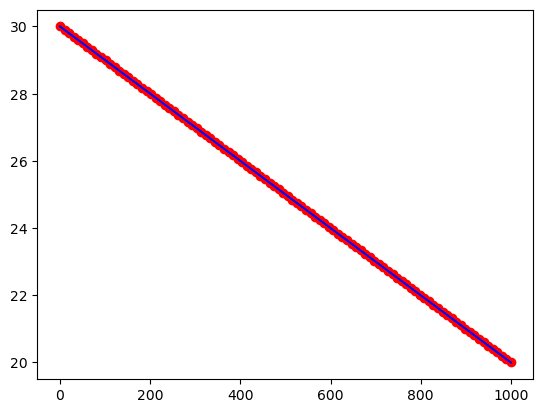

In [9]:
#plt.scatter(channel_coords[1], xy_coords[0])
plt.scatter(x_best,y_best,color='red')
plt.plot(input_x_coords,input_y_coords,color='blue')
plt.show()

### Now map full solution to extracted flux